In [1]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import seaborn as sns
#Using k fold cross validation
from sklearn.model_selection import KFold
from hmmlearn import hmm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn.linear_model import LogisticRegression
import plotly.express as px

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_recall_curve, auc
from plotly.subplots import make_subplots
import itertools
# Run the following two lines of code for Uncaught Error: Script error for plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
data=pd.read_csv("Ionosphere.csv")

In [3]:
print(data.shape)
data

(351, 35)


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
data.describe()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   351 non-null    int64  
 1   Column2   351 non-null    int64  
 2   Column3   351 non-null    float64
 3   Column4   351 non-null    float64
 4   Column5   351 non-null    float64
 5   Column6   351 non-null    float64
 6   Column7   351 non-null    float64
 7   Column8   351 non-null    float64
 8   Column9   351 non-null    float64
 9   Column10  351 non-null    float64
 10  Column11  351 non-null    float64
 11  Column12  351 non-null    float64
 12  Column13  351 non-null    float64
 13  Column14  351 non-null    float64
 14  Column15  351 non-null    float64
 15  Column16  351 non-null    float64
 16  Column17  351 non-null    float64
 17  Column18  351 non-null    float64
 18  Column19  351 non-null    float64
 19  Column20  351 non-null    float64
 20  Column21  351 non-null    float6

In [6]:
names = data.columns[1:5]
# convert DataFrame to list
values=[] 
for column in data.iloc[:,1:5].columns:
    li = data[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
              fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

In [7]:
fig = go.Figure(data=[go.Pie(labels=['Good','Bad'], values=data['Column34'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['black', 'gold'], line=dict(color='#000000', width=2)))
fig.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Column35'] = le.fit_transform(data['Column35']) # B:2, G:4
data['Column35'].value_counts()

1    225
0    126
Name: Column35, dtype: int64

In [9]:
#Separate Feature and Target Matrix
x = data.drop('Column35',axis = 1) 
y = data.Column35

In [10]:
# Split dataset into training set and test set
# 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [11]:
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC() 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=5)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [12]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [13]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 93.57%


In [14]:
y_test_hat=grid.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 95.77%


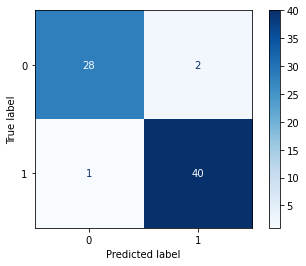

In [15]:
confusion_matrix(y_test,y_test_hat)
disp=plot_confusion_matrix(grid, x_test, y_test,cmap=plt.cm.Blues)

In [16]:
clf = svm.SVC(kernel = 'linear',C=1).fit(x_train, y_train)

In [17]:
Classifier_predications = clf.predict(x_test)
print (accuracy_score(y_test, Classifier_predications)*100)

92.95774647887323


In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, Classifier_predications)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, Classifier_predications)
print("Classification Report for Linear Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,Classifier_predications)*100
print("Overall Accuracy For Linear Discriminat Analysis :",result2)

Confusion Matrix for Linear Discriminat Analysis :
[[25  5]
 [ 0 41]]
Classification Report for Linear Discriminat Analysis :
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.89      1.00      0.94        41

    accuracy                           0.93        71
   macro avg       0.95      0.92      0.93        71
weighted avg       0.94      0.93      0.93        71

Overall Accuracy For Linear Discriminat Analysis : 92.95774647887323


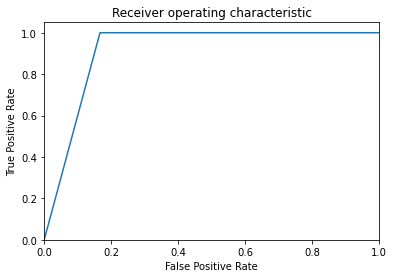

Roc 0.9166666666666667


In [19]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, Classifier_predications)
    roc_auc[i] = auc(fpr[i], tpr[i])


#print roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print('Roc',roc_auc_score(y_test, Classifier_predications))

auc = 0.9166666666666667


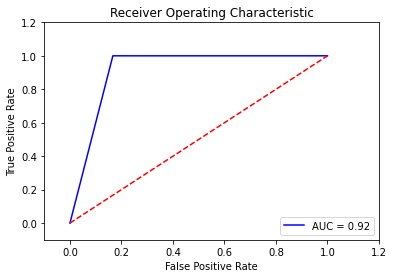

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, Classifier_predications)
auc = auc(fpr, tpr)
print('auc =', auc)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, Classifier_predications)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,25,5
Actual Positive,0,41


In [22]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

In [23]:
print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 91.66666666666667
Specificity:  91.66666666666667
